# Удаление миров с ипсользованием структуры Крипке

In [ ]:
from itertools import combinations
from collections import defaultdict
import random

deck = list(range(7))

def all_deals():
    """Генерация всех допустимых раздач (A, B, C)"""
    deals = []
    for A in combinations(deck, 3):
        rest1 = set(deck) - set(A)
        for B in combinations(rest1, 3):
            rest2 = rest1 - set(B)
            if len(rest2) == 1:
                C = list(rest2)
                deals.append((tuple(sorted(A)), tuple(sorted(B)), tuple(C)))
    return deals
def create_random_structure(n,m):
    classes = defaultdict(list)
    for i in range(m):
      classes[random.randint(0, m-1)].append(i)
    return classes

worlds = all_deals()

n_ag = 3


def create(worlds):
  parts = []
  for agent in range(len(worlds[0])):
      classes = defaultdict(list)
      for w in worlds:
          hand = w[agent]
          classes[hand].append(w)
      parts.append(classes)
  return parts


def modify(parts, agent_id, cluster_index):
    """Удаляем все миры, входящие в выбранный класс агента"""
    removed = set(parts[agent_id][cluster_index])
    for ag in range(len(parts)):
        new_parts = []
        for cls in parts[ag]:
            filtered = [w for w in cls if w not in removed]
    parts = create(filtered)
    return parts


def win(parts, w):
    winners = []
    for i in range(n_ag):
      count = len(parts[i][w[i]])
      if count == 1:
        winners.append(1)
      else:
        winners.append(0)
    return winners


print(len(worlds))
parts=create([worlds[0]])
print(len(parts))
print(parts)
print(win(parts, ((0, 1, 2), (3, 4, 5), (6,))))


140
3
[defaultdict(<class 'list'>, {(0, 1, 2): [((0, 1, 2), (3, 4, 5), (6,))]}), defaultdict(<class 'list'>, {(3, 4, 5): [((0, 1, 2), (3, 4, 5), (6,))]}), defaultdict(<class 'list'>, {(6,): [((0, 1, 2), (3, 4, 5), (6,))]})]
[1, 1, 1]


In [ ]:
from itertools import combinations
from collections import defaultdict
import random


agents_hands = [3, 3, 3]
n_ag = len(agents_hands)
deck = list(range(sum(agents_hands)))

def all_deals(deck, sizes):
    """Все возможные раздачи карт (tuple(hand_0, …, hand_n))."""
    if sum(sizes) != len(deck):
        raise ValueError("Колода должна содержать ровно Σ hand_sizes карт")
    def rec(rest_deck, rest_sizes):
        if not rest_sizes:
            return [()]
        hands = []
        first, *tail = rest_sizes
        for h in combinations(rest_deck, first):
            remainder = tuple(c for c in rest_deck if c not in h)
            for suffix in rec(remainder, tail):
                hands.append((h,) + suffix)
        return hands
    return rec(tuple(deck), sizes)

worlds = all_deals(deck, agents_hands)


def create(worlds):
    parts = []
    n = len(worlds[0])
    for i in range(n):
        classes = defaultdict(list)
        for w in worlds:
            classes[w[i]].append(w)
        parts.append(classes)
    return parts

parts = create(worlds)


def modify(parts, agent_id, cluster_key):
    removed = set(parts[agent_id][cluster_key])
    new_worlds = [w for cls in parts[agent_id].values() for w in cls
                  if w not in removed]
    return create(new_worlds)


def win(parts, real_world):
    return [1 if len(parts[i][real_world[i]]) == 1 else 0
            for i in range(len(parts))]


if __name__ == "__main__":
    print(f"Всего агентов: {n_ag}")
    print(f"Число миров:   {len(worlds)}")

    target = random.choice(worlds)
    print("Целевой мир:", target)

    agent = 0
    hand  = target[agent]
    print(f"Агент {agent} объявляет свой класс: {hand}")

    parts = modify(parts, agent, hand)

    print("Статус знания после хода:")
    for i, knows in enumerate(win(parts, target)):
        print(f"  Агент {i} {'знает' if knows else 'не знает'} мир")


Всего агентов: 3
Число миров:   1680
Целевой мир: ((2, 3, 5), (0, 1, 8), (4, 6, 7))
Агент 0 объявляет свой класс: (2, 3, 5)
Статус знания после хода:
  Агент 0 не знает мир
  Агент 1 не знает мир
  Агент 2 не знает мир


# Объединение в группы по 2

In [ ]:
import matplotlib.pyplot as plt

def dict_diagram(d):
    sizes = [(str(k), len(v)) for k, v in d.items()]


    sizes_sorted = sorted(sizes, key=lambda x: x[1], reverse=True)
    keys_sorted = [k for k, _ in sizes_sorted]
    values_sorted = [v for _, v in sizes_sorted]


    plt.figure(13)
    plt.bar(range(len(keys_sorted)), values_sorted, tick_label=keys_sorted)
    plt.xlabel('Ключ')
    plt.ylabel('Число элементов в списке')
    plt.title('Размеры классов эквивалентности (отсортировано)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Команды агентов: [(0, 1), (2, 3)]

--- Эффективность (средний размер класса эквивалентности) ---
Агент 0:   1260.00
Агент 1:   504.00
Агент 2:   741.18
Агент 3:   572.73
Команда (0, 1): 55.26
Команда (2, 3): 37.95

--- Классы эквивалентности у агентов поодиночке ---


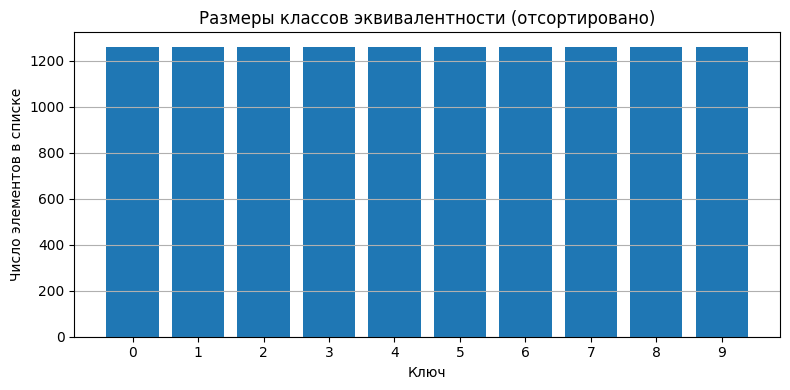

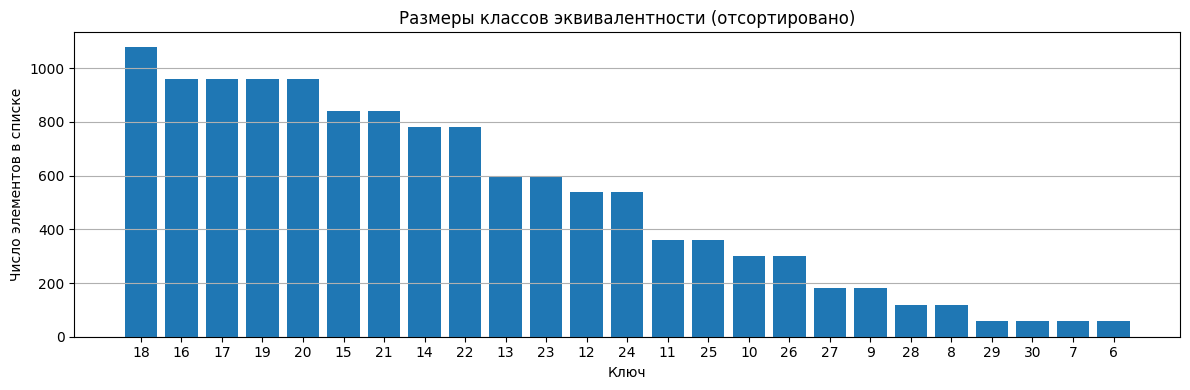

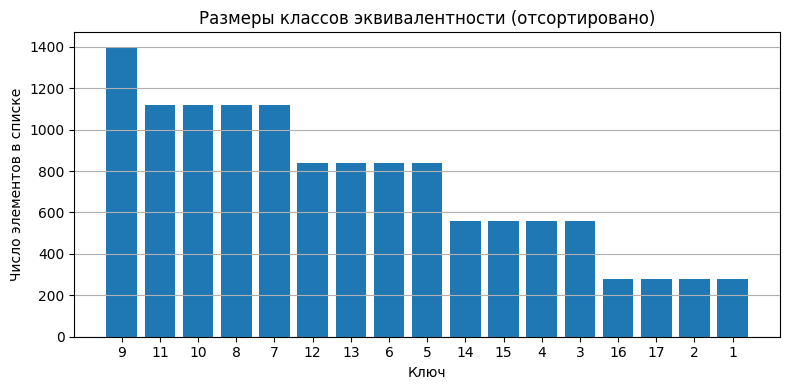

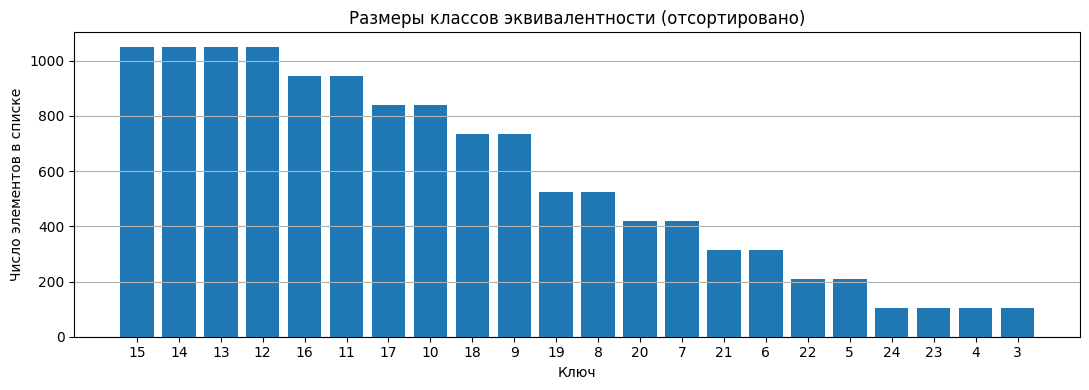


--- Доля уменьшения по сравнению с одиночками ---


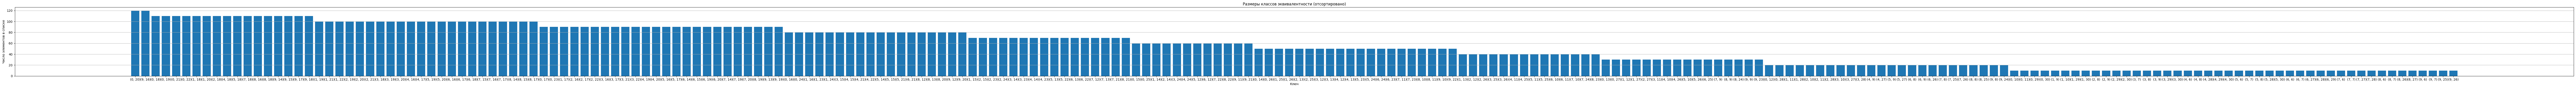

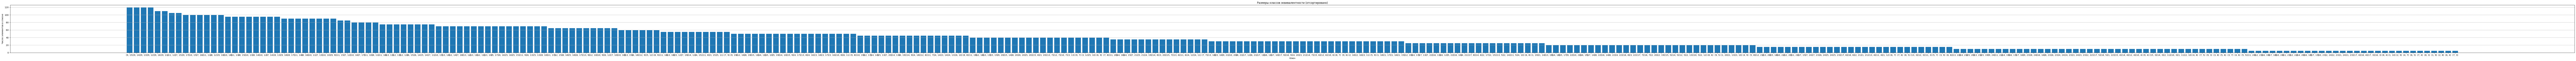

Команда (0, 1): уменьшение 93.7%
Команда (2, 3): уменьшение 94.2%


In [ ]:
from itertools import combinations
from collections import defaultdict
import random
import matplotlib.pyplot as plt

def dict_diagram(d):
    sizes = [(str(k), len(v)) for k, v in d.items()]
    sizes_sorted = sorted(sizes, key=lambda x: x[1], reverse=True)
    keys_sorted = [k for k, _ in sizes_sorted]
    values_sorted = [v for _, v in sizes_sorted]
    plt.figure(figsize=(max(8, len(keys_sorted)//2), 4))
    plt.bar(range(len(keys_sorted)), values_sorted, tick_label=keys_sorted)
    plt.xlabel('Ключ')
    plt.ylabel('Число элементов в списке')
    plt.title('Размеры классов эквивалентности (отсортировано)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def get_agents_hands():
    try:
        line = input("Введите размеры рук агентов через пробел (например, 1 4 2 3): ")
        hands = [int(x) for x in line.strip().split()]
        assert all(x > 0 for x in hands)
        return hands
    except Exception:
        print("Некорректный ввод. Пример: 1 4 2 3")
        exit(1)

agents_hands = get_agents_hands()
n_ag = len(agents_hands)
deck = list(range(sum(agents_hands)))

def all_deals(deck, sizes):
    if sum(sizes) != len(deck):
        raise ValueError("Колода должна содержать ровно Σ hand_sizes карт")
    def rec(rest_deck, rest_sizes):
        if not rest_sizes:
            return [()]
        hands = []
        first, *tail = rest_sizes
        for h in combinations(rest_deck, first):
            remainder = tuple(c for c in rest_deck if c not in h)
            for suffix in rec(remainder, tail):
                hands.append((h,) + suffix)
        return hands
    return rec(tuple(deck), sizes)

worlds = all_deals(deck, agents_hands)


def random_partition(worlds, n_classes=5, seed=None):
    """Разбить worlds на n_classes случайным образом"""
    if seed is not None:
        random.seed(seed)
    classes = defaultdict(list)
    for w in worlds:
        k = random.randint(0, n_classes - 1)
        classes[k].append(w)
    return classes

def custom_partition(worlds, knowledge_func):
    """Разбить worlds по произвольному знанию агента"""
    classes = defaultdict(list)
    for w in worlds:
        k = knowledge_func(w)
        classes[k].append(w)
    return classes

def build_arbitrary_parts(worlds, n_ag, method="random", **kwargs):
    """Собрать parts: список классов для каждого агента — произвольная логика"""
    parts = []
    for i in range(n_ag):
        if method == "random":
            parts.append(random_partition(worlds, **kwargs))
        elif method == "custom":
            def knowledge_func(w, idx=i):
                return sum(w[idx])
            parts.append(custom_partition(worlds, knowledge_func))
        else:
            raise ValueError("Неизвестный метод разбиения")
    return parts

method = "random"
# single_parts = build_arbitrary_parts(worlds, n_ag, method="random", n_classes=5)
single_parts = build_arbitrary_parts(worlds, n_ag, method="custom")

def group_agents(n):
    teams = []
    i = 0
    while i < n:
        if i+1 < n:
            teams.append((i, i+1))
            i += 2
        else:
            teams.append((i,))
            i += 1
    return teams

teams = group_agents(n_ag)
print("Команды агентов:", teams)

def build_team_parts(worlds, teams, method="custom"):
    team_parts = []
    for team in teams:
        if method == "random":
            team_parts.append(random_partition(worlds, n_classes=5))
        elif method == "custom":
            def knowledge_func(w, idxs=team):
                return tuple(sum(w[i]) for i in idxs)
            team_parts.append(custom_partition(worlds, knowledge_func))
        else:
            raise ValueError("Неизвестный метод")
    return team_parts

team_parts = build_team_parts(worlds, teams, method="custom")

def average_class_size(parts):
    sizes = []
    for cls_dict in parts:
        for ws in cls_dict.values():
            sizes.append(len(ws))
    return sum(sizes) / len(sizes) if sizes else 0

print("\n--- Эффективность (средний размер класса эквивалентности) ---")
for idx, part in enumerate(single_parts):
    avg = average_class_size([part])
    print(f"Агент {idx}:   {avg:.2f}")

for idx, part in enumerate(team_parts):
    avg = average_class_size([part])
    print(f"Команда {teams[idx]}: {avg:.2f}")


print("\n--- Классы эквивалентности у агентов поодиночке ---")
for i in range(len(single_parts)):
    dict_diagram(single_parts[i])



print("\n--- Доля уменьшения по сравнению с одиночками ---")
for i in range(len(team_parts)):
    dict_diagram(team_parts[i])

for team_idx, team in enumerate(teams):
    solo_avg = sum(average_class_size([single_parts[i]]) for i in team) / len(team)
    team_avg = average_class_size([team_parts[team_idx]])
    if solo_avg > 0:
        print(f"Команда {team}: уменьшение {100 * (1 - team_avg/solo_avg):.1f}%")
    else:
        print(f"Команда {team}: n/a")


Метрика (сужение пространства миров при объединении):
Агенты 0-1: 0.9722
Агенты 0-2: 0.9821
Агенты 0-3: 0.9864
Агенты 1-2: 0.9821
Агенты 1-3: 0.9864
Агенты 2-3: 0.9810


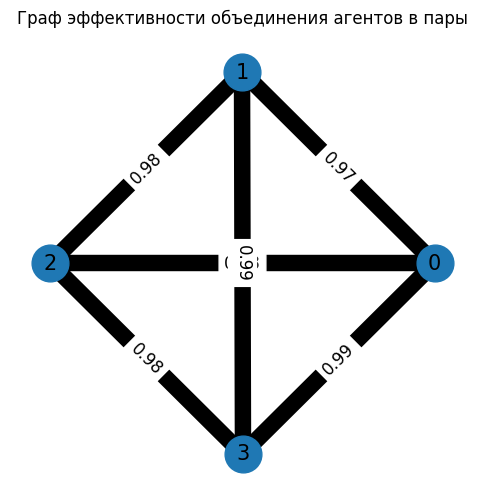

In [ ]:
from itertools import combinations
from collections import defaultdict
import random
import networkx as nx
import matplotlib.pyplot as plt

agents_hands = [2, 2, 3, 4]
n_ag = len(agents_hands)
deck = list(range(sum(agents_hands)))

def all_deals(deck, sizes):
    if sum(sizes) != len(deck):
        raise ValueError("Колода должна содержать ровно Σ hand_sizes карт")
    def rec(rest_deck, rest_sizes):
        if not rest_sizes:
            return [()]
        hands = []
        first, *tail = rest_sizes
        for h in combinations(rest_deck, first):
            remainder = tuple(c for c in rest_deck if c not in h)
            for suffix in rec(remainder, tail):
                hands.append((h,) + suffix)
        return hands
    return rec(tuple(deck), sizes)

worlds = all_deals(deck, agents_hands)


def build_single_parts(worlds):
    n = len(worlds[0])
    parts = []
    for i in range(n):
        classes = defaultdict(list)
        for w in worlds:
            classes[w[i]].append(w)
        parts.append(classes)
    return parts

single_parts = build_single_parts(worlds)

def average_class_size_single(part):
    return sum(len(ws) for ws in part.values()) / len(part) if part else 0

def build_pair_parts(worlds, i, j):
    """Классы для пары агентов i, j"""
    classes = defaultdict(list)
    for w in worlds:
        key = (w[i], w[j])
        classes[key].append(w)
    return classes

def average_class_size_pair(pair_part):
    return sum(len(ws) for ws in pair_part.values()) / len(pair_part) if pair_part else 0

metrics = dict()
for i, j in combinations(range(n_ag), 2):
    avg_i = average_class_size_single(single_parts[i])
    avg_j = average_class_size_single(single_parts[j])
    avg_solo = (avg_i + avg_j) / 2
    pair_part = build_pair_parts(worlds, i, j)
    avg_pair = average_class_size_pair(pair_part)
    if avg_solo > 0:
        metric = 1 - avg_pair / avg_solo
    else:
        metric = 0
    metrics[(i, j)] = metric


print("Метрика (сужение пространства миров при объединении):")
for (i, j), m in metrics.items():
    print(f"Агенты {i}-{j}: {m:.4f}")


G = nx.Graph()
for idx in range(n_ag):
    G.add_node(idx)
for (i, j), m in metrics.items():
    G.add_edge(i, j, weight=round(m, 4), label=f"{m:.2f}")


pos = nx.circular_layout(G)
labels = nx.get_edge_attributes(G, "label")
edge_widths = [2 + 10 * G[u][v]['weight'] for u, v in G.edges()]
plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=15)
nx.draw_networkx_edges(G, pos, width=edge_widths)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
plt.title("Граф эффективности объединения агентов в пары")
plt.axis('off')
plt.show()


In [ ]:
def greedy_teams_from_graph(metrics, n_ag):
    """
    Жадно разбивает агентов на команды по 2, выбирая пару с максимальным весом на каждом шаге.
    metrics -- словарь {(i, j): вес}
    n_ag    -- число агентов
    Возвращает: список команд (tuple из двух или одного агента)
    """
    unused = set(range(n_ag))
    teams = []
    metric_items = list(metrics.items())

    while len(unused) >= 2:
        best = None
        best_score = -1
        for (i, j), score in metric_items:
            if i in unused and j in unused and score > best_score:
                best_score = score
                best = (i, j)
        if best is None:
            break
        i, j = best
        teams.append((i, j))
        unused.remove(i)
        unused.remove(j)

    for i in unused:
        teams.append((i,))
    return teams


team_result = greedy_teams_from_graph(metrics, n_ag)
print("\nЖадное разбиение на команды по максимуму метрики:")
for team in team_result:
    print("Команда:", team)



Жадное разбиение на команды по максимуму метрики:
Команда: (0, 3)
Команда: (1, 2)


# Эксперименты с парами

In [4]:
from typing import Tuple, Dict,List

World      = Tuple[Tuple[int, ...], ...] 
Partition  = Dict[Tuple[int, ...], List[World]]
Teams      = List[Tuple[int, int]]

In [5]:
import random
import itertools
from collections import defaultdict
import numpy as np
from typing import Optional
from typing import Optional
import itertools, random, numpy as np

World      = Tuple[Tuple[int, ...], ...]
Partition  = Dict[Tuple[int, ...], List[World]]
Teams      = List[Tuple[int, int]]

def all_deals(deck: List[int], sizes: List[int]) -> List[World]:
    if sum(sizes) != len(deck):
        raise ValueError("Deck size must match total hand sizes.")
    def rec(rest_deck: Tuple[int, ...], rest_sizes: List[int]) -> List[World]:
        if not rest_sizes:
            return [()]
        first, *tail = rest_sizes
        hands: List[World] = []
        for h in itertools.combinations(rest_deck, first):
            remainder = tuple(c for c in rest_deck if c not in h)
            for suffix in rec(remainder, tail):
                hands.append((h,) + suffix)
        return hands
    return rec(tuple(deck), sizes)


def _random_deal(deck: List[int], sizes: List[int]) -> World:
    deck = deck[:]
    random.shuffle(deck)
    hands, start = [], 0
    for s in sizes:
        hands.append(tuple(sorted(deck[start:start + s])))
        start += s
    return tuple(hands)


def _sample_worlds(deck: List[int], sizes: List[int], max_worlds: int) -> List[World]:
    return [_random_deal(deck, sizes) for _ in range(max_worlds)]

def _partition_by(worlds: List[World], key_fn) -> Partition:
    part: Partition = {}
    for w in worlds:
        k = key_fn(w)
        part.setdefault(k, []).append(w)
    return part


def average_class_size(parts: List[Partition]) -> float:
    sizes = [len(ws) for cls in parts for ws in cls.values()]
    return float(sum(sizes) / len(sizes)) if sizes else 0.0

def _knowledge_single(hand: Tuple[int, ...], *, strategy: str) -> int:
    if strategy == "summation":
        return sum(hand)
    elif strategy == "max":
        return max(hand)
    elif strategy == "random":
        return hash(tuple(sorted(hand))) % 101
    else:
        raise ValueError(f"Unknown strategy: {strategy!r}")


def _knowledge_team_light(hands: List[Tuple[int, ...]], *, strategy: str):
    values = [_knowledge_single(h, strategy=strategy) for h in hands]
    return tuple(sorted(values))


def _knowledge_team_greedy(hands: List[Tuple[int, ...]]):
    return tuple(sorted(set(itertools.chain(*hands))))

def build_parts(worlds: List[World], n_agents: int, strategy: str) -> List[Partition]:
    return [
        _partition_by(worlds,
                      key_fn=lambda w, i=i, s=strategy:
                          _knowledge_single(w[i], strategy=s))
        for i in range(n_agents)
    ]


def build_team_parts(worlds: List[World], teams: Teams, strategy: str, method: str) -> List[Partition]:
    parts: List[Partition] = []
    for pair in teams:
        if len(pair) == 1:
            parts.append(_partition_by(worlds,
                                        key_fn=lambda w, p=pair, s=strategy:
                                            _knowledge_single(w[p[0]], strategy=s)))
        else:
            if method == "greedy":
                k_fn = lambda w, p=pair: _knowledge_team_greedy([w[p[0]], w[p[1]]])
            else:
                k_fn = lambda w, p=pair, s=strategy: _knowledge_team_light([w[p[0]], w[p[1]]], strategy=s)
            parts.append(_partition_by(worlds, k_fn))
    return parts

def _pair_partition(worlds: List[World], i: int, j: int, strategy: str, *, method: str):
    if method == "greedy":
        key_fn = lambda w: _knowledge_team_greedy([w[i], w[j]])
    else:
        key_fn = lambda w, s=strategy: _knowledge_team_light([w[i], w[j]], strategy=s)
    return _partition_by(worlds, key_fn)


def greedy_teams(metrics: Dict[Tuple[int, int], float], n_agents: int) -> Teams:
    unused = set(range(n_agents))
    metric_items = list(metrics.items())
    teams: Teams = []
    while len(unused) >= 2:
        best, best_score = None, -1.0
        for (i, j), score in metric_items:
            if i in unused and j in unused and score > best_score:
                best, best_score = (i, j), score
        if best is None:
            break
        i, j = best
        teams.append((i, j))
        unused.discard(i)
        unused.discard(j)
    for i in unused:
        teams.append((i,))
    return teams


def random_teams(n_agents: int) -> Teams:
    idx = list(range(n_agents))
    random.shuffle(idx)
    return [(idx[i], idx[i + 1]) if i + 1 < len(idx) else (idx[i],) for i in range(0, len(idx), 2)]

def compute_efficiency_sampled(
        n_agents: int,
        agents_hands: List[int],
        *,
        strategy: str = "max",
        method: str = "greedy",
        trials: int = 3,
        max_worlds: int = 300,
        enum_threshold: int = 10,
        rng_seed: Optional[int] = None) -> float:
    if rng_seed is not None:
        random.seed(rng_seed)

    deck = list(range(sum(agents_hands)))

    if sum(agents_hands) <= enum_threshold:
        worlds = list(all_deals(deck, agents_hands))
        if len(worlds) > max_worlds:
            worlds = random.sample(worlds, max_worlds)
    else:
        worlds = _sample_worlds(deck, agents_hands, max_worlds)

    solo_parts = build_parts(worlds, n_agents, strategy)
    solo_avg   = average_class_size(solo_parts)

    eff_vals: List[float] = []
    for _ in range(trials):
        if method == "greedy":
            metrics: Dict[Tuple[int, int], float] = {}
            for i, j in itertools.combinations(range(n_agents), 2):
                pair_part = _pair_partition(worlds, i, j, strategy, method="greedy")
                avg_pair  = average_class_size([pair_part])
                baseline  = (average_class_size([solo_parts[i]]) + average_class_size([solo_parts[j]]) ) / 2
                metrics[(i, j)] = 1 - avg_pair / baseline if baseline else 0.0
            teams = greedy_teams(metrics, n_agents)
        elif method == "random":
            teams = random_teams(n_agents)
        else:
            raise ValueError(f"Unknown method: {method!r}")

        team_parts = build_team_parts(worlds, teams, strategy, method=method)
        team_avg   = average_class_size(team_parts)
        raw_eff    = 1 - team_avg / solo_avg if solo_avg else 0.0
        eff_vals.append(min(1.0, max(0.0, raw_eff)))

    return float(np.mean(eff_vals))

In [ ]:
efficiency_result = {"greedy": [], "random": []}
strategy = "max"
methods = ["greedy", "random"]
N = 4
num_runs = 10

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result


{'greedy': [0.955,
  0.9533333333333335,
  0.9491666666666667,
  0.9533333333333335,
  0.9572147651006712,
  0.9499999999999998,
  0.9516666666666667,
  0.9491666666666667,
  0.9614726027397259,
  0.9558333333333332],
 'random': [0.7988881621975147,
  0.7834841628959276,
  0.7649612403100775,
  0.7255291005291006,
  0.801928955789549,
  0.7281196731910892,
  0.752059752059752,
  0.688753904144184,
  0.7725452907616854,
  0.7296598639455784]}

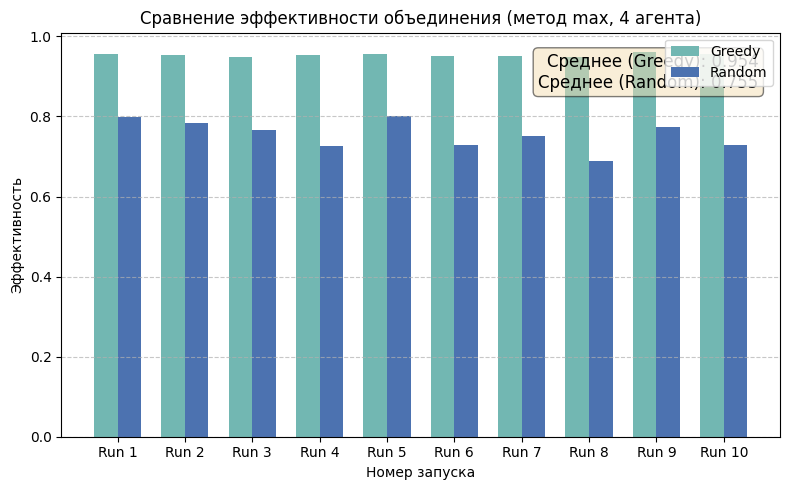

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N4_M = np.mean(efficiency_result["greedy"])
RANDOM_N4_M = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (метод max, 4 агента)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)



textstr = f'Среднее (Greedy): {GREEDY_N4_M:.3f}\nСреднее (Random): {RANDOM_N4_M:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
efficiency_result = {"greedy": [], "random": []}
strategy = "max"
methods = ["greedy", "random"]
N = 6
num_runs = 10

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result


{'greedy': [0.9347826086956522,
  0.9263420724094882,
  0.9397321428571429,
  0.9267241379310344,
  0.9238888888888889,
  0.9257719714964371,
  0.9327777777777778,
  0.9351230425055929,
  0.9319460067491564,
  0.9385847797062751],
 'random': [0.8236791316399622,
  0.8276261673712794,
  0.8007568319423989,
  0.8327286656744614,
  0.8066152196937812,
  0.8340643274853802,
  0.7930691676513035,
  0.8252738654147104,
  0.8208162792567184,
  0.8260458839406208]}

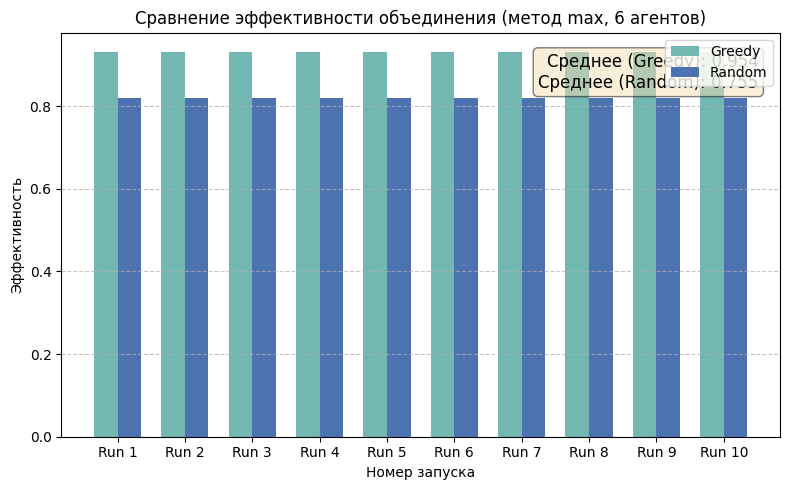

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N6_M = np.mean(efficiency_result["greedy"])
RANDOM_N6_M = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, GREEDY_N6_M, width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, RANDOM_N6_M, width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (метод max, 6 агентов)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
efficiency_result = {"greedy": [], "random": []}
strategy = "max"
methods = ["greedy", "random"]
N = 8
num_runs = 10

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result


{'greedy': [0.91,
  0.9045833333333334,
  0.8987068965517241,
  0.8991666666666666,
  0.9134615384615384,
  0.91125,
  0.8994867408041061,
  0.9033101045296167,
  0.9041666666666667,
  0.9070833333333334],
 'random': [0.7993936010458237,
  0.8049307105461566,
  0.8231138130957386,
  0.8080552336228691,
  0.8189369729635568,
  0.806840332737384,
  0.8201278483789047,
  0.8237670533041676,
  0.8010382815253946,
  0.7953318865524208]}

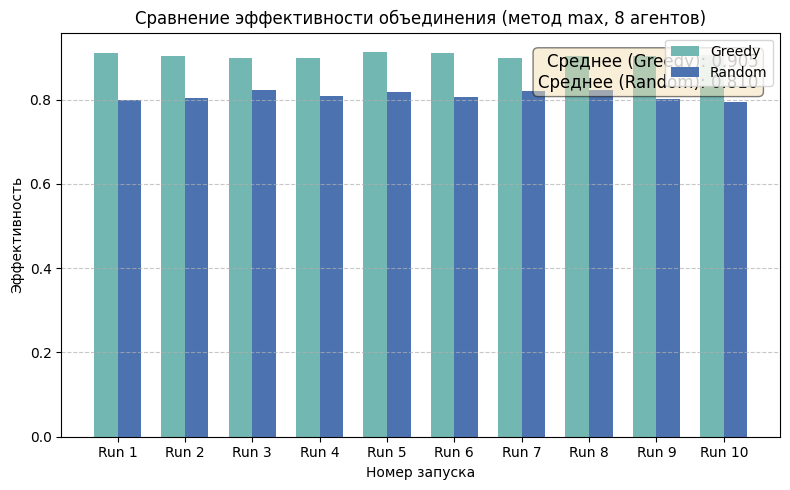

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N8_M = np.mean(efficiency_result["greedy"])
RANDOM_N8_M = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (метод max, 8 агентов)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
strategy = "random"
efficiency_result = {"greedy": [], "random": []}
N = 4

num_runs = 10
trials = 8
max_worlds = 300
methods = ["greedy", "random"]

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result

{'greedy': [0.6825,
  0.6833333333333332,
  0.755,
  0.7391666666666667,
  0.7458333333333332,
  0.7449494949494949,
  0.6808333333333335,
  0.7401960784313726,
  0.8158783783783784,
  0.6783333333333333],
 'random': [0.6699086354258768,
  0.6770274308253152,
  0.7415638226628417,
  0.7343911077185726,
  0.7214728002338622,
  0.7255451693130985,
  0.6696215616124528,
  0.7568193345438748,
  0.7271573604060914,
  0.6699086354258768]}

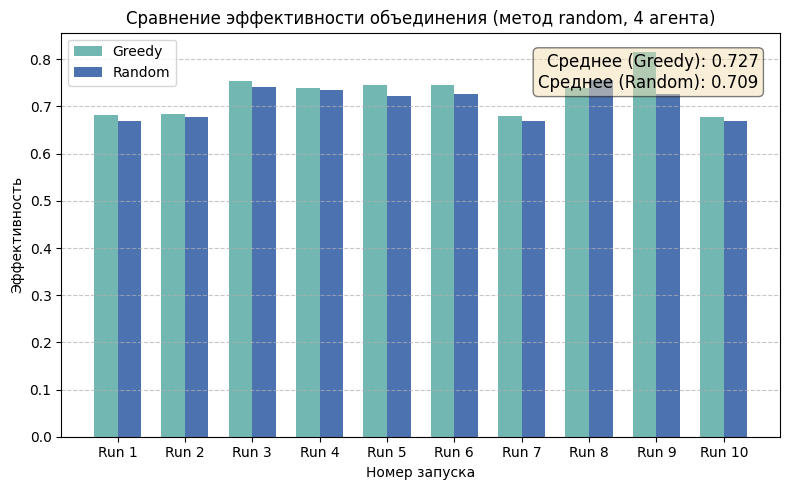

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N4_R = np.mean(efficiency_result["greedy"])
RANDOM_N4_R = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (метод random, 4 агента)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
strategy = "random"
efficiency_result = {"greedy": [], "random": []}
N = 6

num_runs = 10
trials = 8
max_worlds = 300
methods = ["greedy", "random"]

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result

{'greedy': [0.6761111111111111,
  0.7161111111111111,
  0.7377232142857143,
  0.6816666666666666,
  0.6827777777777776,
  0.6777777777777777,
  0.7205555555555557,
  0.6805555555555557,
  0.6805555555555557,
  0.6761111111111111],
 'random': [0.6709184390122372,
  0.7077012835472578,
  0.7222877358490566,
  0.6707313250368326,
  0.6660264773794624,
  0.6685891648409331,
  0.7045113994048752,
  0.6757931622318355,
  0.6747882777943993,
  0.6676201372997713]}

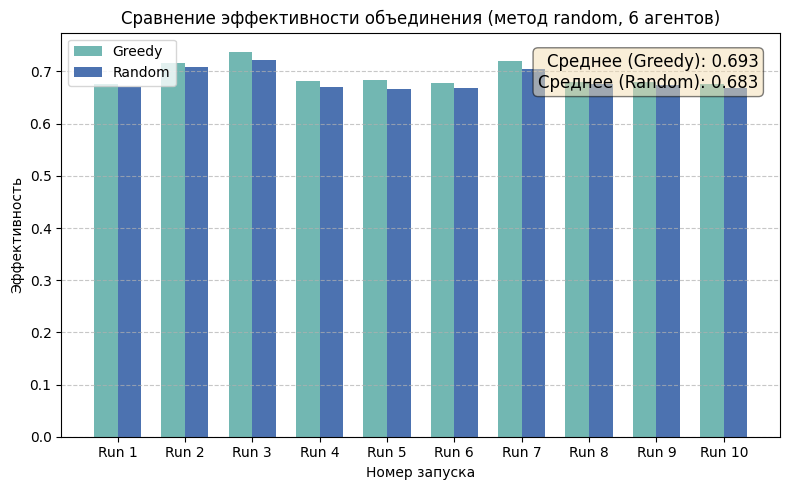

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N6_R = np.mean(efficiency_result["greedy"])
RANDOM_N6_R = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (метод random, 6 агентов)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
strategy = "random"
efficiency_result = {"greedy": [], "random": []}
N = 8

num_runs = 10
trials = 8
max_worlds = 300
methods = ["greedy", "random"]

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result

{'greedy': [0.728213977566868,
  0.71125,
  0.7079166666666666,
  0.6825,
  0.7104166666666667,
  0.7147623019182653,
  0.7095833333333333,
  0.6854166666666667,
  0.6829166666666667,
  0.6820833333333334],
 'random': [0.7191225888284328,
  0.6941680104890877,
  0.6972898512774185,
  0.6672776262698213,
  0.6998279322917513,
  0.7006950994201478,
  0.6992224475997295,
  0.6754780184962184,
  0.670324596590859,
  0.6690086823541019]}

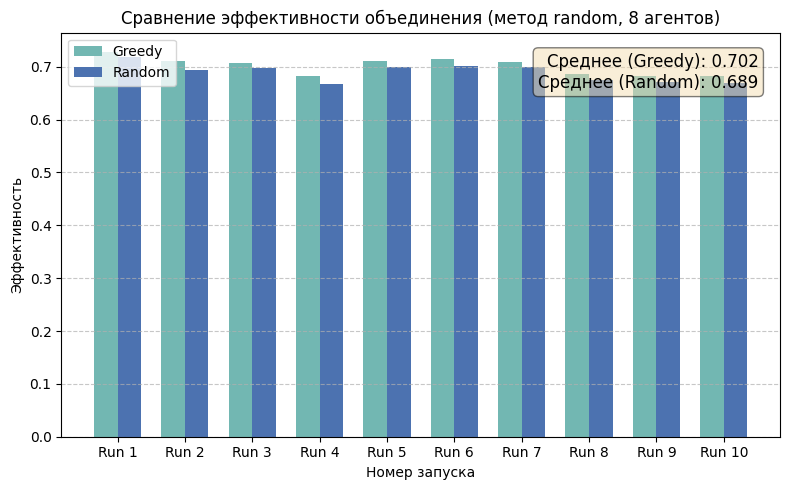

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N8_R = np.mean(efficiency_result["greedy"])
RANDOM_N8_R = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (метод random, 8 агентов)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
efficiency_result = {"greedy": [], "random": []}
strategy = "summation"
methods = ["greedy", "random"]
N = 4
num_runs = 10

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result


{'greedy': [0.8526936026936026,
  0.77,
  0.8143812709030099,
  0.8116666666666666,
  0.7233333333333333,
  0.8283450704225354,
  0.8411371237458193,
  0.8675,
  0.8686594202898551,
  0.8283333333333335],
 'random': [0.8361904761904762,
  0.7565433624218086,
  0.794313369630974,
  0.7960364336049895,
  0.7074435442440817,
  0.8157624347327811,
  0.8109223300970875,
  0.8311388294566383,
  0.8366512345679012,
  0.8116423639957602]}

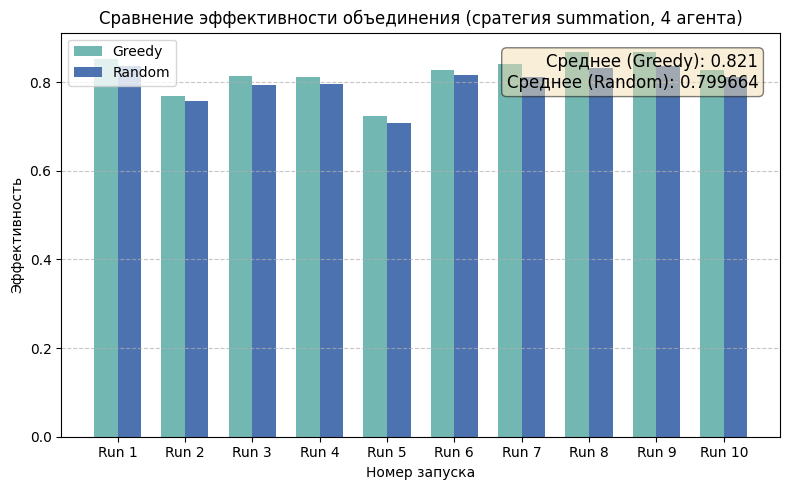

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N4_S = np.mean(efficiency_result["greedy"])
RANDOM_N4_S = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (сратегия summation, 4 агента)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.6f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
efficiency_result = {"greedy": [], "random": []}
strategy = "summation"
methods = ["greedy", "random"]
N = 6
num_runs = 10

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result


{'greedy': [0.7647385984427141,
  0.6788888888888889,
  0.7144444444444445,
  0.6733333333333333,
  0.6733333333333333,
  0.7761111111111112,
  0.8398220244716351,
  0.6933333333333334,
  0.63,
  0.7374581939799332],
 'random': [0.7549797146970292,
  0.6680697626032646,
  0.6971536076297807,
  0.6593719405319352,
  0.663311714454173,
  0.7575665830702598,
  0.8217601742192092,
  0.6758849608218739,
  0.6363754264967897,
  0.7283147850394611]}

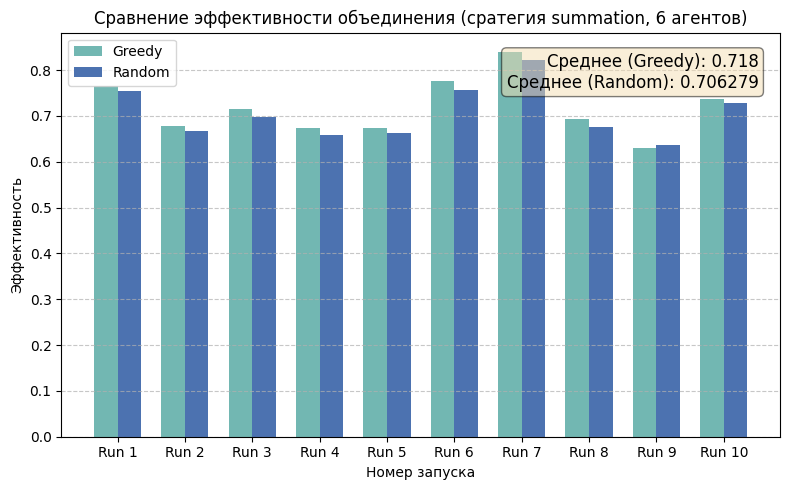

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N6_S = np.mean(efficiency_result["greedy"])
RANDOM_N6_S = np.mean(efficiency_result["random"])

x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (сратегия summation, 6 агентов)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.6f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [1]:
efficiency_result = {"greedy": [], "random": []}
strategy = "summation"
methods = ["greedy", "random"]
N = 8
num_runs = 10

for _ in range(num_runs):
    agents_hands = [random.randint(1, 10) for _ in range(N)]
    for meth in methods:
        eff = compute_efficiency_sampled(
            n_agents=N,
            agents_hands=agents_hands,
            strategy=strategy,
            method=meth,
            trials=3,
            max_worlds=300
        )
        efficiency_result[meth].append(eff)

efficiency_result


NameError: name 'random' is not defined

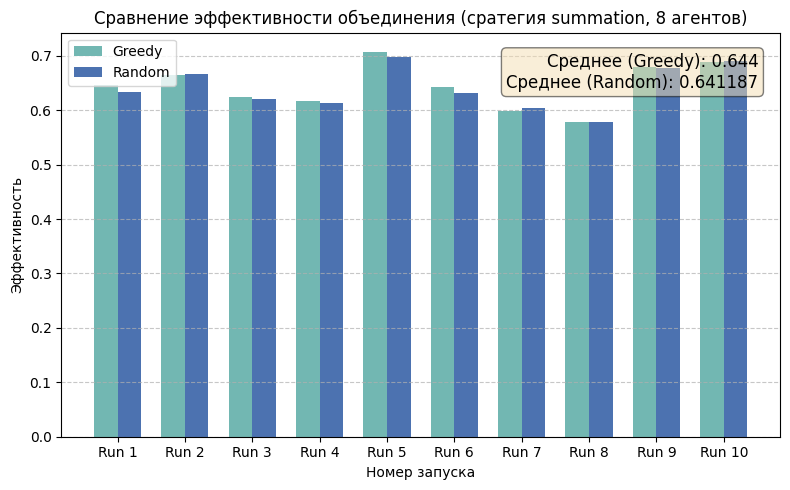

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


GREEDY_N8_S = np.mean(efficiency_result["greedy"])
RANDOM_N8_S = np.mean(efficiency_result["random"])


x = np.arange(len(efficiency_result["greedy"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, efficiency_result["greedy"], width, label='Greedy', color='#72b7b2')
bars2 = ax.bar(x + width/2, efficiency_result["random"], width, label='Random', color='#4c72b0')

ax.set_xlabel('Номер запуска')
ax.set_ylabel('Эффективность')
ax.set_title('Сравнение эффективности объединения (сратегия summation, 8 агентов)')
ax.set_xticks(x)
ax.set_xticklabels([f'Run {i+1}' for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


textstr = f'Среднее (Greedy): {np.mean(efficiency_result["greedy"]):.3f}\nСреднее (Random): {np.mean(efficiency_result["random"]):.6f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.97, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


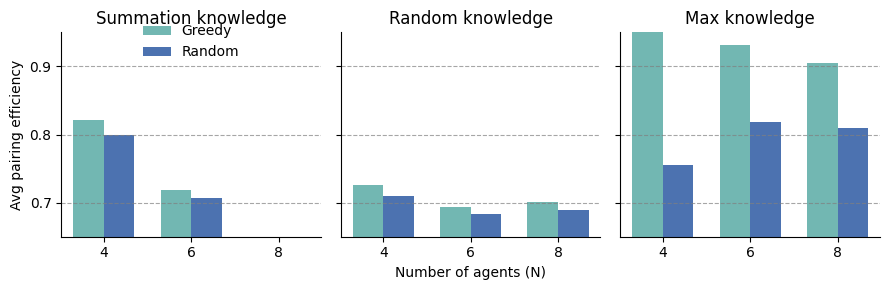

In [ ]:
import itertools, math
import matplotlib.pyplot as plt


N_values = [4, 6, 8]
efficiency = {
    'Summation': {'Greedy': [GREEDY_N4_S, GREEDY_N6_S, GREEDY_N8_S], 'Random': [RANDOM_N4_S, RANDOM_N6_S, RANDOM_N8_S]},
    'Random':    {'Greedy': [GREEDY_N4_R, GREEDY_N6_R, GREEDY_N8_R], 'Random': [RANDOM_N4_R, RANDOM_N6_R, RANDOM_N8_R]},
    'Max':       {'Greedy': [GREEDY_N4_M, GREEDY_N6_M, GREEDY_N8_M], 'Random': [RANDOM_N4_M, RANDOM_N6_M, RANDOM_N8_M]}
}

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(9, 3))
bar_width = 0.35
for i, (knowledge, data) in enumerate(efficiency.items()):
    ax = axs[i]
    x_pos = range(len(N_values))
    ax.bar([x - bar_width/2 for x in x_pos], data['Greedy'], bar_width, label='Greedy', color='#72b7b2')
    ax.bar([x + bar_width/2 for x in x_pos], data['Random'], bar_width, label='Random', color='#4c72b0')
    ax.set_title(f"{knowledge} knowledge")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(N_values)
    if i == 0:
        ax.set_ylabel("Avg pairing efficiency")
    if i == 1:
        ax.set_xlabel("Number of agents (N)")
    ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)
    ax.set_ylim(0.65, 0.95)
    ax.set_yticks([0.70, 0.80, 0.90])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i == 0:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), frameon=False)

plt.tight_layout()
plt.show()


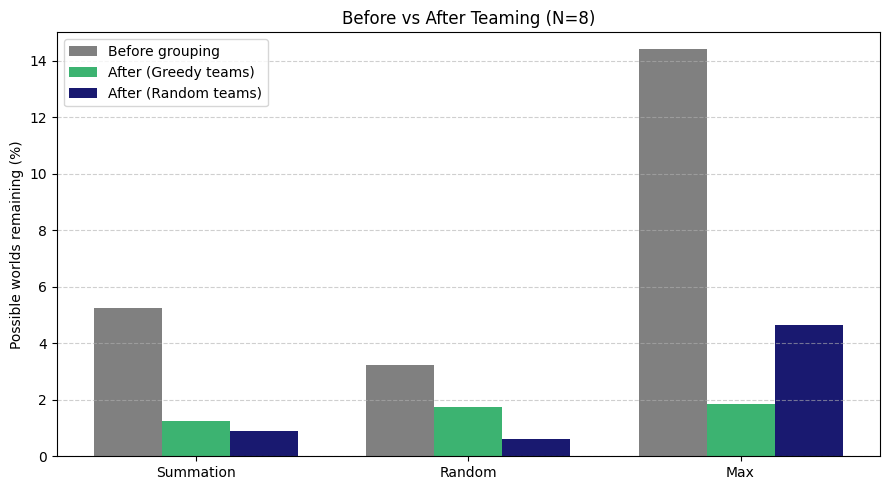

In [ ]:
strategies = ["summation", "random", "max"]
labels = ["Summation", "Random", "Max"]
N = 8
num_trials = 3
max_worlds = 300

before_grouping = []
after_greedy = []
after_random = []

for strategy in strategies:
    solo_sizes, greedy_sizes, random_sizes = [], [], []

    for _ in range(num_trials):
        agents_hands = [random.randint(1, 4) for _ in range(N)]
        deck = list(range(sum(agents_hands)))
        all_possible = all_deals(deck, agents_hands)
        worlds = random.sample(all_possible, max_worlds) if len(all_possible) > max_worlds else all_possible

        solo_parts = build_parts(worlds, N, strategy)
        solo_avg = average_class_size(solo_parts)
        solo_sizes.append(solo_avg)


        metrics = {}
        for i, j in itertools.combinations(range(N), 2):
            solo_i = average_class_size([solo_parts[i]])
            solo_j = average_class_size([solo_parts[j]])
            class_dict = custom_partition(worlds, lambda w: tuple(sorted(w[i] + w[j])))
            avg_pair = average_class_size([class_dict])
            avg_solo = (solo_i + solo_j) / 2
            metrics[(i, j)] = 1 - (avg_pair / avg_solo) if avg_solo > 0 else 0

        greedy_team = greedy_teams(metrics, N)
        random_team = random_teams(N)

        greedy_avg = average_class_size(build_team_parts(worlds, greedy_team, strategy, "greedy"))
        random_avg = average_class_size(build_team_parts(worlds, random_team, strategy, "random"))

        greedy_sizes.append(greedy_avg)
        random_sizes.append(random_avg)

    before_grouping.append(np.mean(solo_sizes) / len(worlds) * 100)
    after_greedy.append(np.mean(greedy_sizes) / len(worlds) * 100)
    after_random.append(np.mean(random_sizes) / len(worlds) * 100)


x = np.arange(len(strategies))
width = 0.25

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x - width, before_grouping, width, label='Before grouping', color='gray')
ax.bar(x, after_greedy, width, label='After (Greedy teams)', color='mediumseagreen')
ax.bar(x + width, after_random, width, label='After (Random teams)', color='midnightblue')

ax.set_ylabel('Possible worlds remaining (%)')
ax.set_title(f'Before vs After Teaming (N=8)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 15)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import typing as tp


def graph_with_N(N: int): 
    def sample_worlds(deck: tp.List[int], sizes: tp.List[int], k: int) -> tp.List[tp.Tuple[tp.Tuple[int, ...], ...]]:
        worlds = []
        for _ in range(k):
            d = deck[:] 
            random.shuffle(d)
            pos = 0
            hands = []
            for s in sizes:
                hands.append(tuple(sorted(d[pos:pos+s])))
                pos += s
            worlds.append(tuple(hands))
        return worlds

    def custom_partition(worlds, key_fn):
        classes = defaultdict(list)
        for w in worlds:
            classes[key_fn(w)].append(w)
        return classes

    def average_class_size(class_dict):
        sizes = [len(ws) for ws in class_dict.values()]
        return sum(sizes) / len(sizes) if sizes else 0


    num_samples = 1000
    max_worlds  = 300
    strategy    = "max"

    random_eff = []
    greedy_eff = []

    for _ in range(num_samples):
        agents_hands = [random.randint(1, 10) for _ in range(N)]
        deck = list(range(sum(agents_hands)))
        worlds = sample_worlds(deck, agents_hands, max_worlds)
        
        solo_parts = []
        for i in range(N):
            knowledge_func = lambda w, idx=i: tuple(sorted(w[idx]))
            solo_parts.append(custom_partition(worlds, knowledge_func))

        for i, j in itertools.combinations(range(N), 2):
            avg_solo = (
                average_class_size(solo_parts[i]) +
                average_class_size(solo_parts[j])
            ) / 2

            knowledge_g = lambda w, a=i, b=j: tuple(sorted(w[a] + w[b]))
            part_g = custom_partition(worlds, knowledge_g)
            avg_g = average_class_size(part_g)
            eff_g = 1 - avg_g / avg_solo if avg_solo > 0 else 0
            greedy_eff.append(eff_g)

            knowledge_r = lambda w, a=i, b=j: hash((w[a], w[b])) % 50
            part_r = custom_partition(worlds, knowledge_r)
            avg_r = average_class_size(part_r)
            eff_r = 1 - avg_r / avg_solo if avg_solo > 0 else 0
            random_eff.append(eff_r)

    plt.figure(figsize=(8, 5))
    plt.hist(random_eff, bins=20, alpha=0.5, label='Random pairs', color='mediumpurple')
    plt.hist(greedy_eff, bins=20, alpha=0.5, label='Greedy pairs', color='mediumseagreen')
    plt.xlabel("Pair efficiency metric")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of pair efficiency (Max knowledge, N={N})")
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


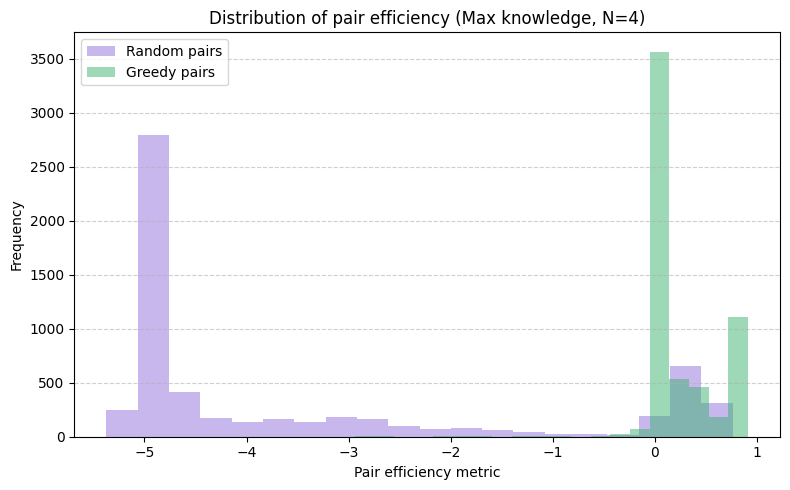

In [ ]:
graph_with_N(4)

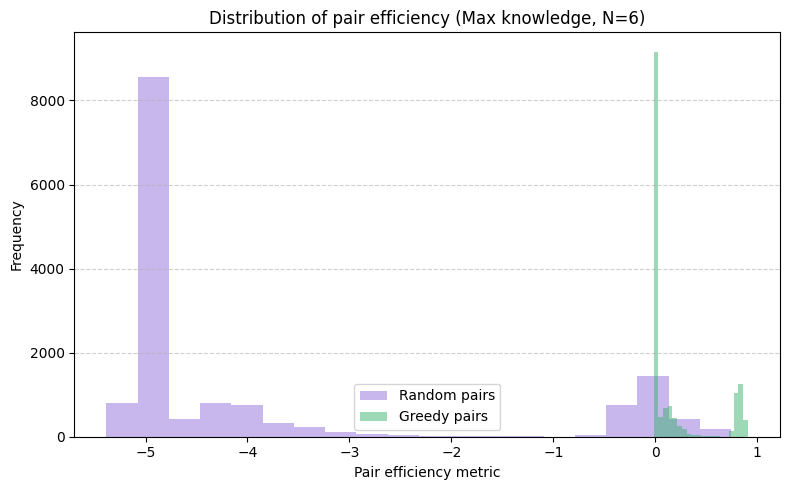

In [ ]:
graph_with_N(6)

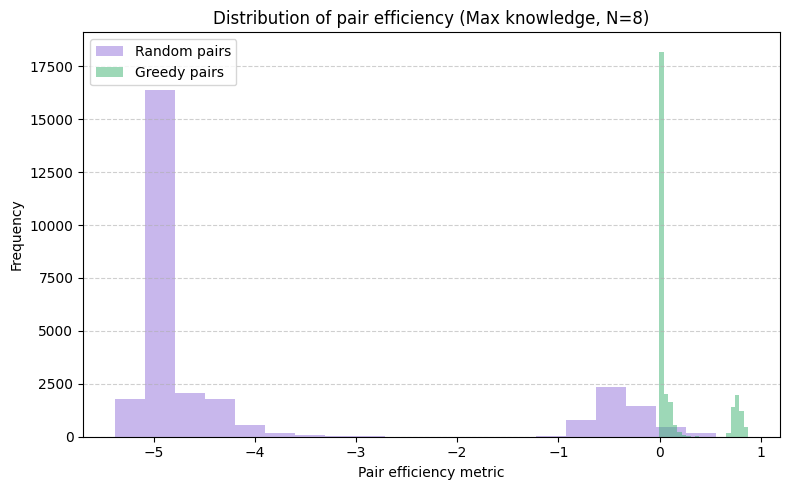

In [ ]:
graph_with_N(8)